In [4]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-09-24 14:56:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  82.3MB/s    in 6.6s    

2022-09-24 14:56:54 (75.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [7]:
import os
#walk through 10 classes of food 
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
  

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/train
there are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
there are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
there are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
there are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
there are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
there are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
there are 0 directories and 750 images in 10_food_classes_all_data/train/steak
there are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
there are 10 directories and 0 imag

In [6]:
#setup the train and test direcrotires
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pathlib
import random
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train/") #create a lsit of clas name
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[:10]
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [10]:
# lets vizualize our images
import os
def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  #read the image
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape:{img.shape}") #show the shape of image
  

image shape:(512, 512, 3)


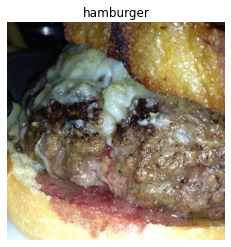

In [ ]:
view_random_image("10_food_classes_all_data/train/",target_class=random.choice(class_names))

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [12]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical"
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical"
                                             )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#get sample data batches
images,labels = train_data.next()

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

#create a model
model_1 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
#compile the model
model_1.compile(loss ="categorical_crossentropy",
                optimizer =Adam(),
                metrics =["accuracy"])
history_1 = model_1.fit (train_data,
                        epochs = 5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )


Epoch 1/5
235/235 [==============================] - 59s 196ms/step - loss: 2.1003 - accuracy: 0.2381 - val_loss: 1.9452 - val_accuracy: 0.3124
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.8321 - accuracy: 0.3748 - val_loss: 1.9638 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.4612 - accuracy: 0.5119 - val_loss: 1.9752 - val_accuracy: 0.3468
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 0.8620 - accuracy: 0.7223 - val_loss: 2.4284 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.3630 - accuracy: 0.8920 - val_loss: 3.3523 - val_accuracy: 0.2948


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 3.3523 - accuracy: 0.2948


[3.3523082733154297, 0.2948000133037567]

In [ ]:
def plot_loss_curves(history):
  """ returns seprate loss curves for training """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))# how many epochs did we run for
  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend() 




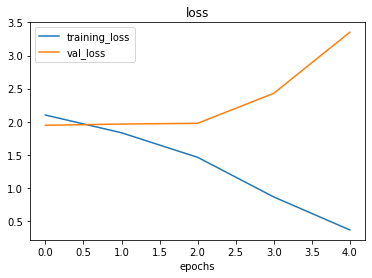

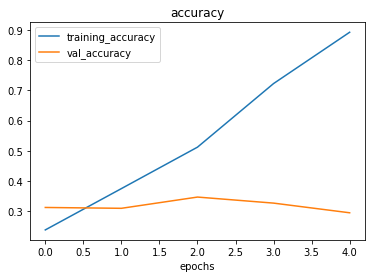

In [ ]:
plot_loss_curves(history_1)

# Adjust the model hyperparameter (to reduce over fitting)

In [ ]:
 model_2 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
#compile the model
model_2.compile(loss ="categorical_crossentropy",
                optimizer =Adam(),
                metrics =["accuracy"])
history_1 = model_2.fit (train_data,
                        epochs = 5,
                        steps_per_epoch =len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 48s 198ms/step - loss: 2.0784 - accuracy: 0.2629 - val_loss: 1.9523 - val_accuracy: 0.3112
Epoch 2/5
235/235 [==============================] - 47s 202ms/step - loss: 1.7048 - accuracy: 0.4273 - val_loss: 1.9146 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 45s 192ms/step - loss: 1.2881 - accuracy: 0.5800 - val_loss: 2.0253 - val_accuracy: 0.3100
Epoch 4/5
235/235 [==============================] - 42s 179ms/step - loss: 0.7680 - accuracy: 0.7675 - val_loss: 2.3303 - val_accuracy: 0.2968
Epoch 5/5
235/235 [==============================] - 42s 179ms/step - loss: 0.3990 - accuracy: 0.8913 - val_loss: 2.7038 - val_accuracy: 0.2792


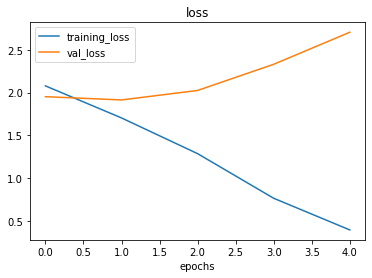

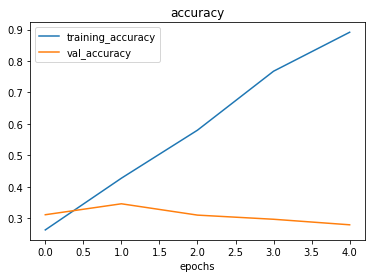

In [ ]:
plot_loss_curves(history_1)

# Data agumentataion


In [13]:
train_datagen_agumented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range=0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True
                                             )
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [14]:
#agumented data

train_data_agumented = train_datagen_agumented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size = 32,
                                                                   class_mode ="categorical"

)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical"
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical"
                                             )

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [15]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
model_3 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
#compile the model
model_3.compile(loss ="categorical_crossentropy",
                optimizer =Adam(),
                metrics =["accuracy"])
history_3 = model_3.fit (train_data_agumented,
                        epochs = 10,
                        steps_per_epoch =len(train_data_agumented),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/10
235/235 [==============================] - 137s 529ms/step - loss: 2.2409 - accuracy: 0.1785 - val_loss: 2.0840 - val_accuracy: 0.2528
Epoch 2/10
235/235 [==============================] - 111s 473ms/step - loss: 2.1127 - accuracy: 0.2521 - val_loss: 1.9814 - val_accuracy: 0.3040
Epoch 3/10
235/235 [==============================] - 111s 473ms/step - loss: 2.0627 - accuracy: 0.2885 - val_loss: 1.9191 - val_accuracy: 0.3416
Epoch 4/10
235/235 [==============================] - 109s 462ms/step - loss: 2.0102 - accuracy: 0.3032 - val_loss: 1.9077 - val_accuracy: 0.3336
Epoch 5/10
235/235 [==============================] - 108s 461ms/step - loss: 1.9906 - accuracy: 0.3091 - val_loss: 1.8898 - val_accuracy: 0.3484
Epoch 6/10
235/235 [==============================] - 108s 460ms/step - loss: 1.9565 - accuracy: 0.3196 - val_loss: 1.8022 - val_accuracy: 0.3976
Epoch 7/10
235/235 [==============================] - 108s 460ms/step - loss: 1.9343 - accuracy: 0.3379 - val_loss: 1.7658 -

In [ ]:
#model cloning
# model_3 = tf.keras.models.clone_model(model_2)

In [18]:
model_3.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.7910 - accuracy: 0.4028


[1.7909635305404663, 0.4027999937534332]

# making a prediction on our trained model

In [30]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

steak = mpimg.imread("03-steak.jpeg")

--2022-09-24 15:23:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-09-24 15:23:18 (210 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]

--2022-09-24 15:23:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response

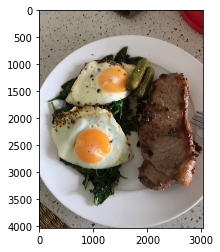

In [33]:
plt.imshow(steak)

In [34]:
expanded_steaks = tf.expand_dims(steak,axis=0)

In [17]:
#create a function to import and  image and resize it to be able to
def load_and_pred_image(filename,img_shape=224):
  #read in the image
  img = tf.io.read_file(filename)
  #decode the read file into tensor
  img=tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #rescale the image
  img=img/255.
  return img 

In [20]:
steak = load_and_pred_image("03-steak.jpeg")
pred=model_3.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.02876395, 0.01807928, 0.04249314, 0.19950384, 0.0857555 ,
        0.02437866, 0.02105261, 0.09037156, 0.41128716, 0.07831428]],
      dtype=float32)

**Reconfig pred and plot to work in multiclass category**

In [21]:
def pred_and_plot(model,filename,class_names=class_names):
  #import the target image
  img = load_and_pred_image(filename)
  #make a prediciton
  pred = model.predict(tf.expand_dims(img,axis=0))
  #adding logic for multiclass to mmake 1 array
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #plot the image and prdict class
  plt.imshow(img)
  plt.title(f"Prediciton:{pred_class}")
  plt.axis(False)

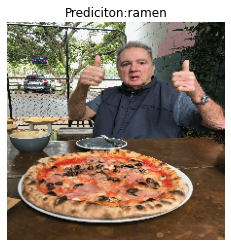

In [25]:
pred_and_plot(model_3,"03-pizza-dad.jpeg")


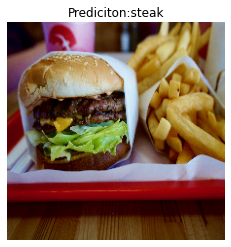

In [32]:
pred_and_plot(model_3,"03-hamburger.jpeg.2")